## Hand Gloves Detection using DL

#### Imports

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import os
import cv2
from PIL import Image

import xml.etree.ElementTree as ET
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, MaxPooling2D, BatchNormalization, Activation, Dropout, Flatten, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

In [4]:
IMAGE_SIZE = (224, 224, 3)  
NUM_CLASSES = 2  # 0 means there are no gloves present and 1 means there are gloves present
BATCH_SIZE = 32
NUM_EPOCHS = 10
LEARNING_RATE = 0.001

In [26]:
def count_files(directory):
    xml_count = 0
    jpg_count = 0

    for filename in os.listdir(directory):
        if filename.endswith('.xml'):
            xml_count += 1
        elif filename.endswith('.jpg'):
            jpg_count += 1

    print(f"Number of XML files: {xml_count}")
    print(f"Number of JPG files: {jpg_count}")


data_path = '/kaggle/input/handgloves-detection-dataset/Images'
count_files(data_path)

Number of XML files: 465
Number of JPG files: 465


In [31]:
# Load image data and annotations from XML files
IMG_SIZE = (224, 224)
def load_data(data_path):
    images = []
    labels = []

    for filename in os.listdir(data_path):
        try:
            if filename.endswith('.xml'):
                xml_file = os.path.join(data_path, filename)
                tree = ET.parse(xml_file)
                root = tree.getroot()

                image_path = os.path.join(data_path, root.find('filename').text)
                image = cv2.imread(image_path)
                image = cv2.resize(image, IMG_SIZE)
                images.append(image)
                print(filename, "Passed")

                object_name = root.find('object/name').text
                if (object_name == 'human_palm'):
                    labels.append(0)
                elif (object_name == 'glove'):
                    labels.append(1)
                print(filename, "Passed")
        except:
            print(filename, "Failed")
            pass
        
    return np.array(images), np.array(labels)

data_path = '/kaggle/input/handgloves-detection-dataset/Images'
images, labels = load_data(data_path)

1593323449867.xml Passed
1593323449867.xml Passed
1592293027762.xml Passed
1592293027762.xml Passed
1593996206147.xml Passed
1593996206147.xml Passed
1596612121382.xml Passed
1596612121382.xml Passed
1592279604876.xml Passed
1592279604876.xml Passed
1596468156678.xml Passed
1596468156678.xml Passed
1591580532547.xml Passed
1591580532547.xml Passed
1597132374419.xml Passed
1597132374419.xml Passed
1596430119749.xml Passed
1596430119749.xml Passed
1591588302665.xml Passed
1591588302665.xml Passed
1591661044770.xml Passed
1591661044770.xml Passed
1594025181116.xml Passed
1594025181116.xml Passed
1593793562106.xml Passed
1593793562106.xml Passed
1593940543973.xml Passed
1593940543973.xml Passed
1596707598997.xml Passed
1596707598997.xml Passed
1596763800338.xml Passed
1596763800338.xml Passed


Invalid SOS parameters for sequential JPEG


1592319308845.xml Passed
1592319308845.xml Passed
1591580426512.xml Passed
1591580426512.xml Passed
1596291752875.xml Passed
1596291752875.xml Passed
1591660957506.xml Passed
1591660957506.xml Passed
1593330263785.xml Passed
1593330263785.xml Passed
1596466888276.xml Passed
1596466888276.xml Passed
1591801221275.xml Passed
1591801221275.xml Passed


Premature end of JPEG file


1594022926833.xml Passed
1594022926833.xml Passed
1593331268570.xml Passed
1593331268570.xml Passed
1592908017305.xml Passed
1592908017305.xml Passed
1592907807335.xml Passed
1592907807335.xml Passed
1593413637169.xml Passed
1593413637169.xml Passed
1597134885413.xml Passed
1597134885413.xml Passed
1596430087873.xml Passed
1596430087873.xml Passed
1597258648410.xml Passed
1597258648410.xml Passed
1591580600194.xml Passed
1591580600194.xml Passed
1596474225937.xml Passed
1596474225937.xml Passed
1591580101392.xml Passed
1591580101392.xml Passed
1592319459143.xml Passed
1592319459143.xml Passed
1596426235256.xml Passed
1596426235256.xml Passed
1591587343257.xml Passed
1591587343257.xml Passed
1593413614954.xml Passed
1593413614954.xml Passed
1596603292749.xml Passed
1596603292749.xml Passed
1596468171165.xml Passed
1596468171165.xml Passed
1591580571859.xml Passed
1591580571859.xml Passed
1593329793740.xml Passed
1593329793740.xml Passed
1596304936914.xml Passed
1596304936914.xml Passed


Premature end of JPEG file


1597322454410.xml Passed
1597322454410.xml Passed
1592293863211.xml Passed
1592293863211.xml Passed
1591580767130.xml Passed
1591580767130.xml Passed
1591529518426.xml Passed
1591529518426.xml Passed
1596468579549.xml Passed
1596468579549.xml Passed
1596679427056.xml Passed
1596679427056.xml Passed
1591661028447.xml Passed
1591661028447.xml Passed
1592293348385.xml Passed
1592293348385.xml Passed
1596468248798.xml Passed
1596468248798.xml Passed
1596466869714.xml Passed
1596466869714.xml Passed
1592293174606.xml Passed
1592293174606.xml Passed
1596467205027.xml Passed
1596467205027.xml Passed
1591661006048.xml Passed
1591661006048.xml Passed
1596519795368.xml Passed
1596519795368.xml Passed
1591591169753.xml Passed
1591591169753.xml Passed
1596727274637.xml Passed
1596727274637.xml Passed
1596468792681.xml Passed
1596468792681.xml Passed
1596612571475.xml Passed
1596612571475.xml Passed
1591640507524.xml Passed
1591640507524.xml Passed
1596474202968.xml Passed
1596474202968.xml Passed


Premature end of JPEG file


1594025404833.xml Passed
1594025404833.xml Passed
1597258673053.xml Passed
1597258673053.xml Passed
1596896131207.xml Passed
1596896131207.xml Passed
1591587224729.xml Passed
1591587224729.xml Passed
1596519651201.xml Passed
1596519651201.xml Passed
1591580009337.xml Passed
1591580009337.xml Passed
1596727548348.xml Passed
1596727548348.xml Passed
1593933880298.xml Passed
1593933880298.xml Passed
1594022863616.xml Passed
1594022863616.xml Passed
1593320671279.xml Passed
1593320671279.xml Passed
1593793546229.xml Passed
1593793546229.xml Passed
1596767342135.xml Passed
1596767342135.xml Passed
1593323482365.xml Passed
1593323482365.xml Passed
1596612630033.xml Passed
1596612630033.xml Passed
1592444263323.xml Passed
1592444263323.xml Passed
1591580883669.xml Passed
1591580883669.xml Passed
1596702179640.xml Passed
1596702179640.xml Passed
1597232992096.xml Passed
1597232992096.xml Passed
1596474183639.xml Passed
1596474183639.xml Passed
1596679366564.xml Passed
1596679366564.xml Passed


Invalid SOS parameters for sequential JPEG


1596467301063.xml Passed
1596467301063.xml Passed
1596467077640.xml Passed
1596467077640.xml Passed
1593332780561.xml Passed
1593332780561.xml Passed
1596468569950.xml Passed
1596468569950.xml Passed
1596299560318.xml Passed
1596299560318.xml Passed
1593329819052.xml Passed
1593329819052.xml Passed
1592907831183.xml Passed
1592907831183.xml Passed
1596679534246.xml Passed
1596679534246.xml Passed
1591580065561.xml Passed
1591580065561.xml Passed
1596612582515.xml Passed
1596612582515.xml Passed
1596340261754.xml Passed
1596340261754.xml Passed
1593933924236.xml Passed
1593933924236.xml Passed
1596468805098.xml Passed
1596468805098.xml Passed
1596727375776.xml Passed
1596727375776.xml Passed
1591661136928.xml Passed
1591661136928.xml Passed
1596467481387.xml Passed
1596467481387.xml Passed
1593612476024.xml Passed
1593612476024.xml Passed
1594025319225.xml Passed
1594025319225.xml Passed
1596612359329.xml Passed
1596612359329.xml Passed
1594017518724.xml Passed
1594017518724.xml Passed


In [32]:
images.shape

(465, 224, 224, 3)

In [33]:
labels.shape

(465,)

In [34]:
print(labels)

[0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0
 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0
 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0
 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1
 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0
 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1
 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0
 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0
 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1
 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1
 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0]


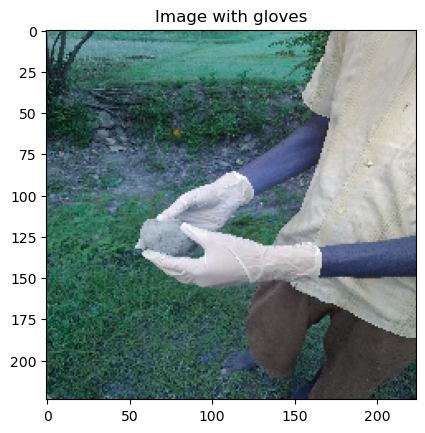

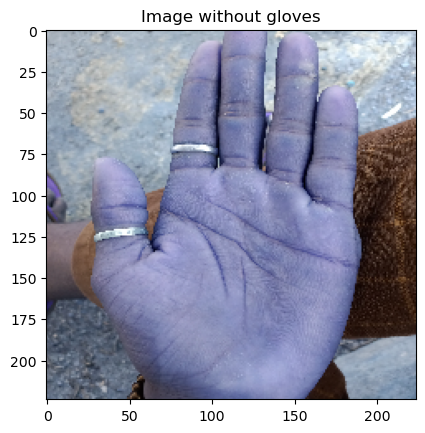

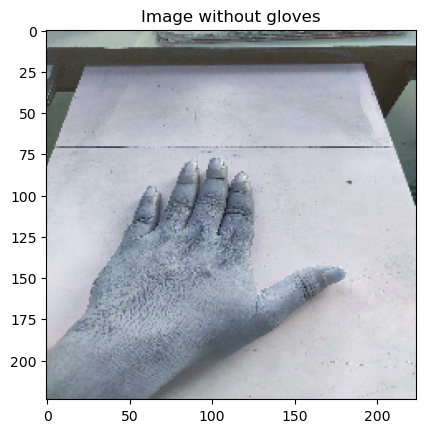

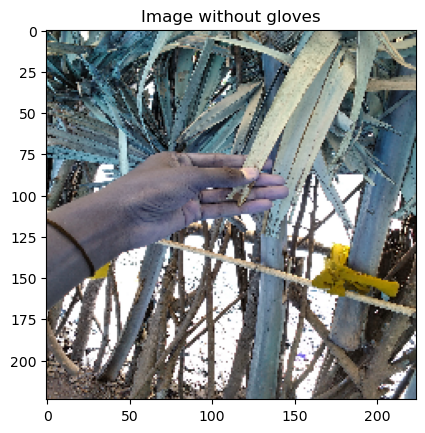

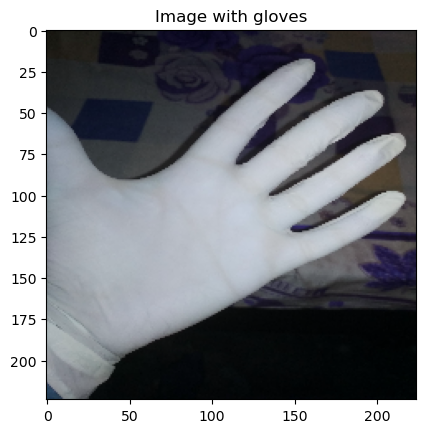

In [35]:
# checking everything is correct till now
import random

# Select random five images
random_indices = random.sample(range(len(images)), 5)

# Display images and set titles
for index in random_indices:
    img = np.reshape(images[index], (224, 224, 3))
    plt.imshow(img)
    if labels[index] == 1:
        plt.title('Image with gloves')
    else:
        plt.title('Image without gloves')
    plt.show()


In [36]:
# function to plote training history
def plot_history(history):
    # store results
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # plot results
    # accuracy
    plt.figure(figsize=(5, 8))
    plt.rcParams['figure.figsize'] = [8, 4]
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.grid'] = True
    plt.rcParams['figure.facecolor'] = 'white'
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy: {str(round(acc[-1],3))}\nValidation Accuracy: {str(round(val_acc[-1],3))}')
    
    # loss
    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.title(f'Training and Validation Loss. \nTrain Loss: {str(round(loss[-1],3))}\nValidation Loss: {str(round(val_loss[-1],3))}')
    plt.xlabel('epoch')
    plt.tight_layout(pad=3.0)
    plt.show()

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.2, random_state=0)

In [38]:
# normalizing

X_train = X_train / 255
X_test = X_test / 255

In [39]:
X_train[3].shape

(224, 224, 3)

#### Approach 1: CNN

In [40]:
# Model Definition

model = keras.Sequential()

model.add(Conv2D(32, (3, 3), input_shape = IMAGE_SIZE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

# sigmoid is used for binary classification not softmax

In [41]:
model.compile(loss='binary_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                    

In [43]:
history = model.fit(X_train, Y_train,
                  batch_size = 64,
                  verbose=1,
                  epochs=20,
                  validation_data=(X_test, Y_test),
                  shuffle=False)

Epoch 1/20
6/6 [==============================] - 7s 282ms/step - loss: 0.9162 - accuracy: 0.5215 - val_loss: 0.6683 - val_accuracy: 0.5591
Epoch 2/20
6/6 [==============================] - 0s 60ms/step - loss: 0.6287 - accuracy: 0.6532 - val_loss: 0.6300 - val_accuracy: 0.6129
Epoch 3/20
6/6 [==============================] - 0s 62ms/step - loss: 0.5831 - accuracy: 0.6989 - val_loss: 0.5333 - val_accuracy: 0.6882
Epoch 4/20
6/6 [==============================] - 0s 75ms/step - loss: 0.4935 - accuracy: 0.8091 - val_loss: 0.5044 - val_accuracy: 0.7419
Epoch 5/20
6/6 [==============================] - 0s 60ms/step - loss: 0.4330 - accuracy: 0.8199 - val_loss: 0.5406 - val_accuracy: 0.7419
Epoch 6/20
6/6 [==============================] - 0s 77ms/step - loss: 0.4225 - accuracy: 0.8145 - val_loss: 0.3888 - val_accuracy: 0.8710
Epoch 7/20
6/6 [==============================] - 0s 76ms/step - loss: 0.4005 - accuracy: 0.8306 - val_loss: 0.4019 - val_accuracy: 0.8495
Epoch 8/20
6/6 [==========

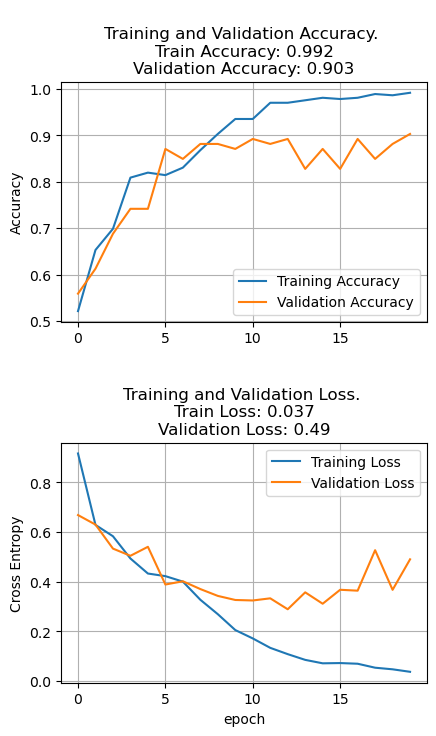

In [44]:
plot_history(history)

#### Approach 2: VGG16

In [48]:
def create_model(base_model):
    
    x = base_model.output    
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation = 'relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(64, activation = 'relu')(x)
    x = Dropout(0.2)(x)
    
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = Model(base_model.inputs, outputs)
    
    return model 

In [46]:
def fit_model(model, base_model, epochs, fine_tune = 0):
    
    early = tf.keras.callbacks.EarlyStopping( patience = 10,
                                              min_delta = 0.001,
                                              restore_best_weights = True)
    
    print("Unfreezing number of layers in base model = ", fine_tune)
    
    if fine_tune > 0:
        base_model.trainable = True
        for layer in base_model.layers[:-fine_tune]:
            layer.trainable = False       
        # small learning rate for fine tuning
        model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
    else:
        base_model.trainable = False
        model.compile(optimizer=tf.keras.optimizers.Adam(),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

    history = model.fit(X_train, Y_train,
                        validation_data = (X_test, Y_test),
                        epochs = 15,
                        callbacks = [early])
    
    return history


In [53]:
# load the VGG19 architecture with imagenet weights as base
vgg16_base_model = tf.keras.applications.vgg16.VGG16(
                             include_top = False,
                             weights = 'imagenet',
                             input_shape = (224, 224, 3)
                             )


vgg16_model = create_model(vgg16_base_model)
vgg16_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [54]:
history = fit_model(vgg16_model, vgg16_base_model, epochs = 15)

Unfreezing number of layers in base model =  0
Epoch 1/15
12/12 [==============================] - 9s 429ms/step - loss: 0.7075 - accuracy: 0.5538 - val_loss: 0.6705 - val_accuracy: 0.5376
Epoch 2/15
12/12 [==============================] - 1s 107ms/step - loss: 0.6609 - accuracy: 0.6129 - val_loss: 0.6424 - val_accuracy: 0.5376
Epoch 3/15
12/12 [==============================] - 1s 96ms/step - loss: 0.6541 - accuracy: 0.6102 - val_loss: 0.6152 - val_accuracy: 0.5376
Epoch 4/15
12/12 [==============================] - 1s 96ms/step - loss: 0.6247 - accuracy: 0.6317 - val_loss: 0.5658 - val_accuracy: 0.7097
Epoch 5/15
12/12 [==============================] - 1s 105ms/step - loss: 0.5906 - accuracy: 0.7043 - val_loss: 0.5297 - val_accuracy: 0.7742
Epoch 6/15
12/12 [==============================] - 1s 105ms/step - loss: 0.5555 - accuracy: 0.7312 - val_loss: 0.4697 - val_accuracy: 0.8495
Epoch 7/15
12/12 [==============================] - 1s 96ms/step - loss: 0.5070 - accuracy: 0.7661 - va

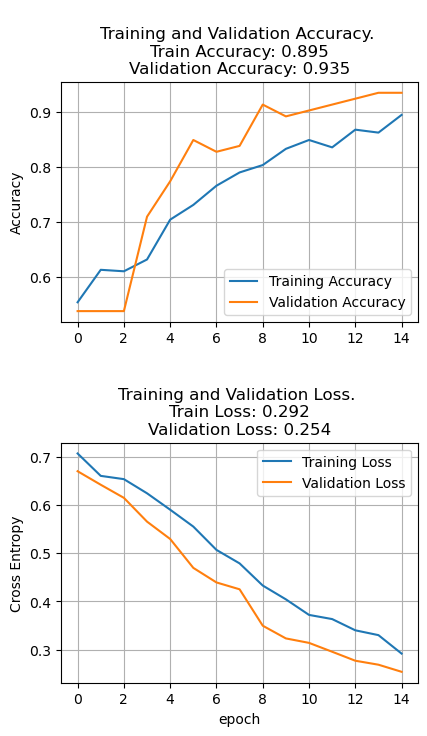

In [55]:
plot_history(history)

In [56]:
_, acc = vgg16_model.evaluate(X_test, Y_test)
print("Accuracy: ", (acc*100.0), " %")

3/3 [==============================] - 0s 74ms/step - loss: 0.2536 - accuracy: 0.9355
Accuracy:  93.54838728904724  %


#### Approach 3: Inception

In [60]:
# load the InceptionResNetV2 architecture with imagenet weights as base
inception_base_model = tf.keras.applications.InceptionResNetV2(
                     include_top = False,
                     weights = 'imagenet',
                     input_shape = (224, 224, 3)
                     )

In [61]:
inception_model = create_model(inception_base_model)
inception_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_206 (Conv2D)            (None, 111, 111, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_203 (Batch  (None, 111, 111, 32  96         ['conv2d_206[0][0]']             
 Normalization)                 )                                                           

In [62]:
history = fit_model(inception_model, inception_base_model, epochs = 15)

Unfreezing number of layers in base model =  0
Epoch 1/15
12/12 [==============================] - 23s 858ms/step - loss: 0.7243 - accuracy: 0.6022 - val_loss: 0.5114 - val_accuracy: 0.7742
Epoch 2/15
12/12 [==============================] - 2s 171ms/step - loss: 0.5516 - accuracy: 0.7339 - val_loss: 0.4151 - val_accuracy: 0.8387
Epoch 3/15
12/12 [==============================] - 2s 184ms/step - loss: 0.4706 - accuracy: 0.8011 - val_loss: 0.3268 - val_accuracy: 0.9140
Epoch 4/15
12/12 [==============================] - 2s 146ms/step - loss: 0.3848 - accuracy: 0.8172 - val_loss: 0.3284 - val_accuracy: 0.8817
Epoch 5/15
12/12 [==============================] - 2s 202ms/step - loss: 0.3327 - accuracy: 0.8548 - val_loss: 0.2827 - val_accuracy: 0.8602
Epoch 6/15
12/12 [==============================] - 2s 173ms/step - loss: 0.2944 - accuracy: 0.8629 - val_loss: 0.2667 - val_accuracy: 0.8710
Epoch 7/15
12/12 [==============================] - 2s 140ms/step - loss: 0.2507 - accuracy: 0.8898 

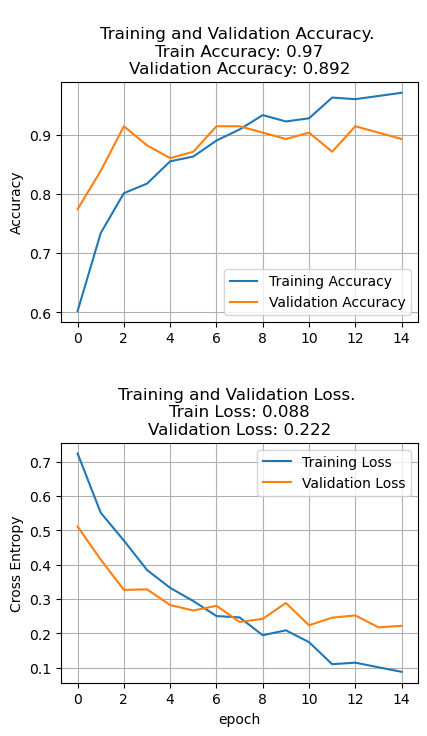

In [63]:
plot_history(history)

In [64]:
_, acc = inception_model.evaluate(X_test, Y_test)
print("Accuracy: ", (acc*100.0), " %")

3/3 [==============================] - 0s 108ms/step - loss: 0.2221 - accuracy: 0.8925
Accuracy:  89.24731016159058  %


#### Approach 4: Xception

In [65]:
# load the xception architecture with imagenet weights as base
xception_base_model = tf.keras.applications.xception.Xception(
                                 include_top = False,
                                 weights = 'imagenet',
                                 input_shape = (224, 224, 3)
                                 )

83683744/83683744 [==============================] - 1s 0us/step


In [66]:
xception_model = create_model(xception_base_model)
xception_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [67]:
history = fit_model(xception_model, xception_base_model, epochs = 15)

Unfreezing number of layers in base model =  0
Epoch 1/15
12/12 [==============================] - 9s 360ms/step - loss: 0.7064 - accuracy: 0.5699 - val_loss: 0.5286 - val_accuracy: 0.7204
Epoch 2/15
12/12 [==============================] - 1s 115ms/step - loss: 0.4993 - accuracy: 0.7742 - val_loss: 0.3911 - val_accuracy: 0.8495
Epoch 3/15
12/12 [==============================] - 1s 121ms/step - loss: 0.3529 - accuracy: 0.8468 - val_loss: 0.2830 - val_accuracy: 0.9032
Epoch 4/15
12/12 [==============================] - 1s 122ms/step - loss: 0.2694 - accuracy: 0.9005 - val_loss: 0.2646 - val_accuracy: 0.9032
Epoch 5/15
12/12 [==============================] - 1s 111ms/step - loss: 0.2268 - accuracy: 0.9140 - val_loss: 0.3214 - val_accuracy: 0.9032
Epoch 6/15
12/12 [==============================] - 1s 122ms/step - loss: 0.1797 - accuracy: 0.9435 - val_loss: 0.2543 - val_accuracy: 0.9140
Epoch 7/15
12/12 [==============================] - 1s 104ms/step - loss: 0.1385 - accuracy: 0.9624 -

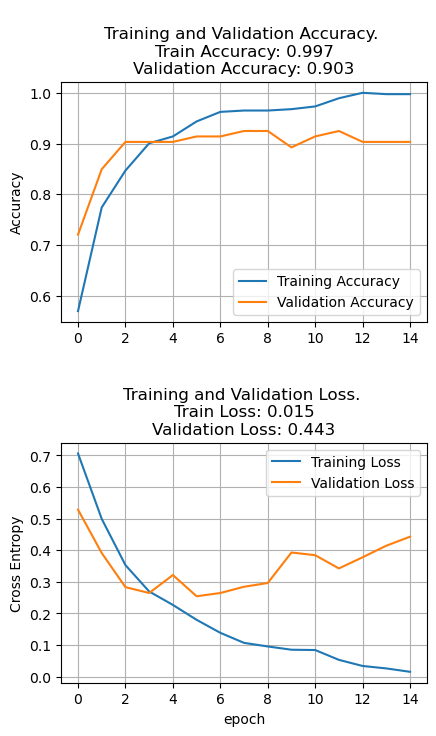

In [68]:
plot_history(history)

In [69]:
_, acc = xception_model.evaluate(X_test, Y_test)
print("Accuracy: ", (acc*100.0), " %")

3/3 [==============================] - 0s 80ms/step - loss: 0.4428 - accuracy: 0.9032
Accuracy:  90.32257795333862  %
